In [1]:
from array import array
from cmath import nan
from pyexpat import model
import statistics
from tkinter.ttk import Separator
import numpy as np
import pandas as pd
import os

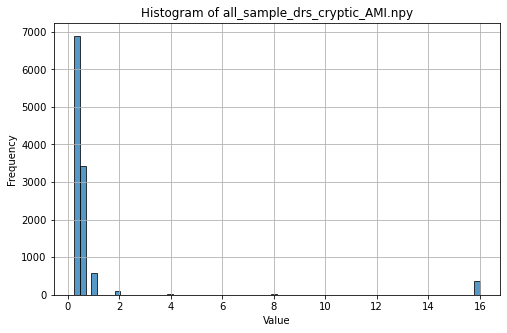

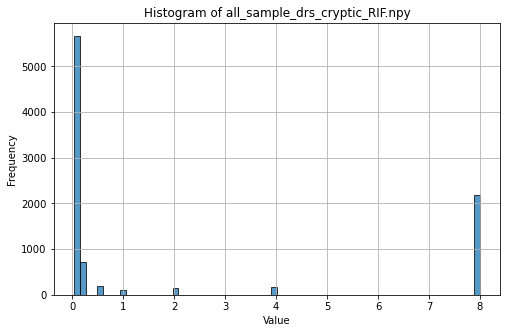

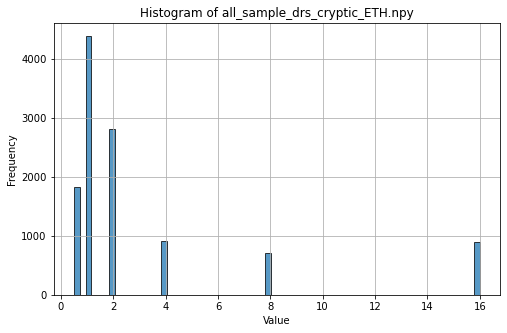

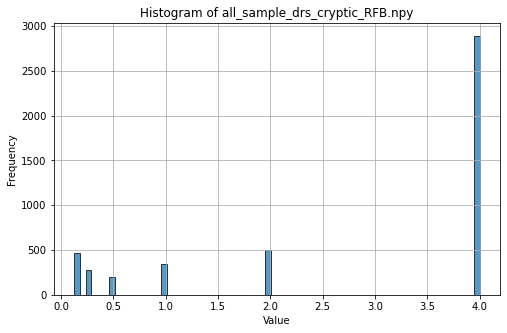

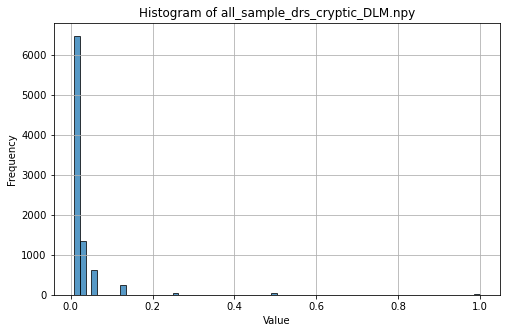

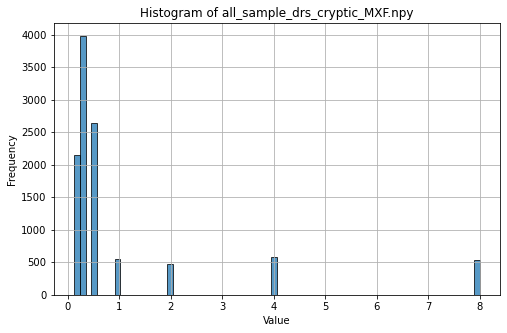

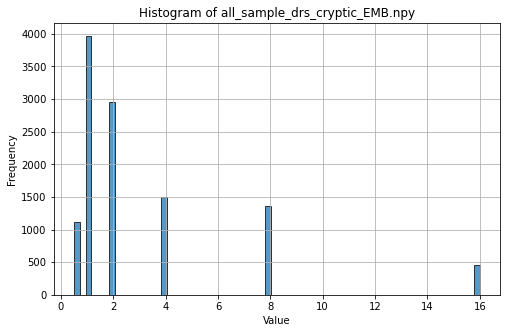

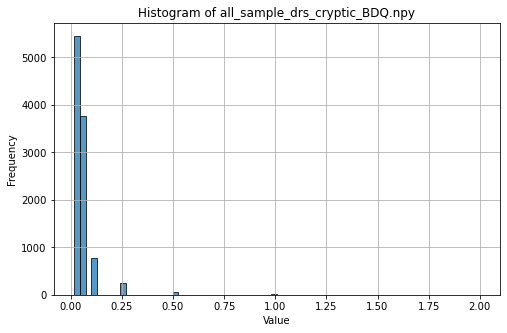

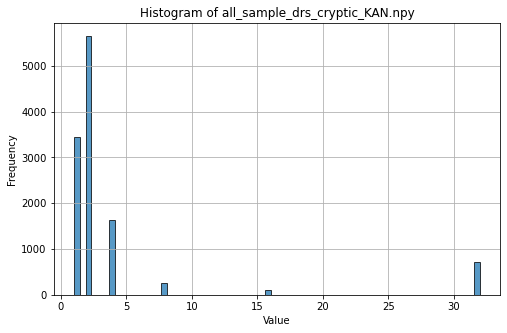

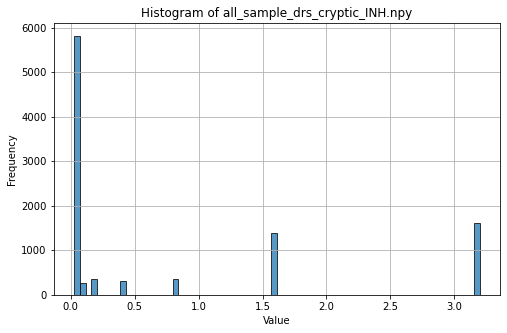

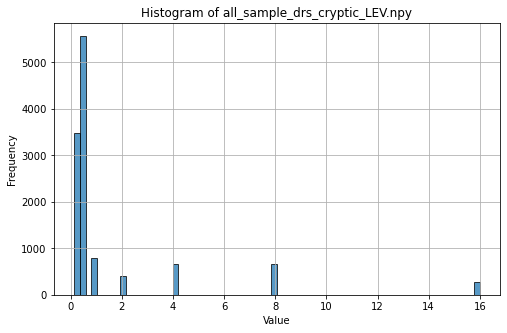

                                           0.250000   0.500000   1.000000   \
all_sample_drs_cryptic_AMI.npy                6889.0     3427.0      583.0   
all_sample_drs_cryptic_RIF.npy                 717.0      185.0      114.0   
all_sample_drs_cryptic_RFB.npy                 281.0      204.0      349.0   
all_sample_drs_cryptic_DLM.npy                  53.0       40.0       29.0   
all_sample_drs_cryptic_MXF.npy                3979.0     2645.0      557.0   
all_sample_drs_cryptic_BDQ.npy                 242.0       63.0       24.0   
all_sample_drs_cryptic_LEV.npy                3056.0     5570.0      788.0   
all_sample_drs_cryptic_ETH.npy                   0.0     1820.0     4390.0   
all_sample_drs_cryptic_EMB.npy                   0.0     1117.0     3968.0   
all_sample_drs_50k_KAN.npy                       0.0        0.0     5472.0   
all_sample_drs_50k_INH.npy                       0.0        0.0    37094.0   
all_sample_drs_50k_AMI.npy                       0.0        0.0 

In [ ]:
# Re-import necessary libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory path
directory = "/mnt/storageG1/lwang/Projects/tb_dr_MIC3/individual_models/generated_data18122024"

# Get all files in the directory containing 'drs'
try:
    files = [f for f in os.listdir(directory) if 'drs' in f and f.endswith('.npy')]
except FileNotFoundError:
    print("Directory not found. Please check the path.")
    files = []

# Initialize a dictionary to store value counts
value_counts_dict = {}

# Process each file
for file in files:
    file_path = os.path.join(directory, file)
    
    # Load the .npy file
    try:
        data = np.load(file_path)
    except Exception as e:
        print(f"Error loading {file}: {e}")
        continue
    
    # Compute value counts
    unique_values, counts = np.unique(data, return_counts=True)
    value_counts_dict[file] = dict(zip(unique_values, counts))
    
    # If 'cryptic' is in the filename, generate a histogram
    if 'cryptic' in file:
        plt.figure(figsize=(8, 5))
        plt.hist(data, bins=70, edgecolor='black', alpha=0.75)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {file}")
        plt.grid(True)
        plt.show()

# Convert value counts to a DataFrame for better readability
df_value_counts = pd.DataFrame.from_dict(value_counts_dict, orient='index').fillna(0)

# Display the DataFrame
# print(df_value_counts)


In [7]:
df_value_counts


,0.250000,0.500000,1.000000,2.000000,4.000000,8.000000,16.000000,0.000000,0.031250,0.062500,...,0.015625,32.000000,0.025000,0.050000,0.100000,0.200000,0.400000,0.800000,1.600000,3.200000
all_sample_drs_cryptic_AMI.npy,6889.0,3427.0,583.0,88.0,33.0,31.0,378.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
all_sample_drs_cryptic_RIF.npy,717.0,185.0,114.0,149.0,161.0,2182.0,0.0,0.0,2273.0,1308.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
all_sample_drs_cryptic_RFB.npy,281.0,204.0,349.0,503.0,2890.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
all_sample_drs_cryptic_MXF.npy,3979.0,2645.0,557.0,467.0,580.0,540.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
all_sample_drs_cryptic_BDQ.npy,242.0,63.0,24.0,5.0,0.0,0.0,0.0,0.0,4030.0,3763.0,...,1424.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
all_sample_drs_cryptic_LEV.npy,3056.0,5570.0,788.0,396.0,653.0,652.0,285.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
all_sample_drs_cryptic_ETH.npy,0.0,1820.0,4390.0,2820.0,910.0,708.0,891.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
all_sample_drs_cryptic_EMB.npy,0.0,1117.0,3968.0,2957.0,1493.0,1366.0,461.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
all_sample_drs_50k_KAN.npy,0.0,0.0,4556.0,0.0,0.0,0.0,0.0,119092.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
all_sample_drs_50k_RIF.npy,0.0,0.0,36811.0,0.0,0.0,0.0,0.0,67163.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:

# Extract row names that contain '50k'
filtered_rows = df_value_counts[df_value_counts.index.str.contains("50k", na=False)]

# Display the filtered rows
filtered_rows[[0,1]]


,0.0,1.0
all_sample_drs_50k_KAN.npy,118176.0,5472.0
all_sample_drs_50k_INH.npy,58420.0,37094.0
all_sample_drs_50k_AMI.npy,123187.0,829.0
all_sample_drs_50k_MXF.npy,111588.0,12058.0
all_sample_drs_50k_DLM.npy,49445.0,208.0
all_sample_drs_50k_RIF.npy,67095.0,36879.0
all_sample_drs_50k_LEV.npy,110776.0,12011.0
all_sample_drs_50k_EMB_checks.npy,94448.0,28171.0
all_sample_drs_50k_EMB.npy,94525.0,28219.0
all_sample_drs_50k_EMB_checks-removed.npy,77.0,48.0


In [2]:
csv_dr = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/variants_full.csv')

In [5]:
csv_dr['drugs'].value_counts()


drugs
rifampicin                                                            45130
isoniazid                                                             42775
streptomycin                                                          41550
ethambutol                                                            37720
pyrazinamide                                                          31071
isoniazid,ethionamide                                                 17190
ofloxacin,moxifloxacin,levofloxacin,fluoroquinolones,ciprofloxacin    15606
ethionamide                                                            8262
kanamycin,capreomycin,aminoglycosides,amikacin                         7833
ethionamide,ethionamide                                                5214
kanamycin                                                              4866
para-aminosalicylic_acid                                               3694
pyrazinamide,pyrazinamide                                              2712
cyclos